In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

file_path = "/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv"
data = pd.read_csv(file_path)

In [2]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

aqi_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
data[aqi_columns] = data[aqi_columns].apply(pd.to_numeric)

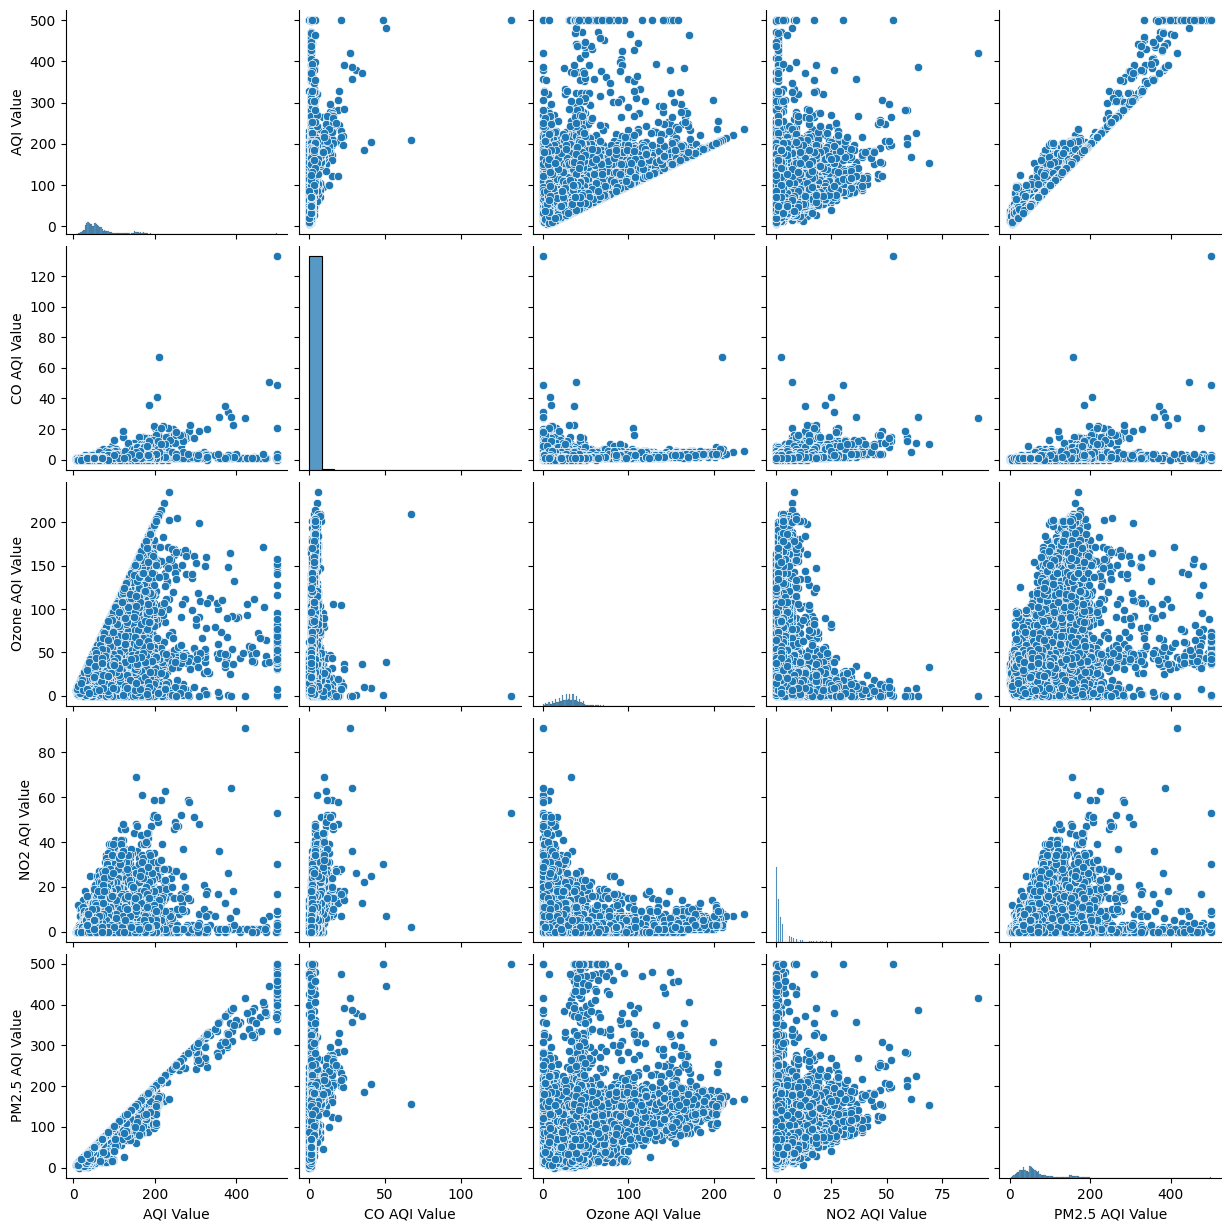

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    sns.pairplot(data[aqi_columns])
    plt.show()

Судячи з отриманих графіків можемо проаналізувати зв'язок між `PM2.5 AQI Value` та `AQI Value`

Mean Squared Error: 103.37195023208908
R^2 Score: 0.9689793224643256
Correlation: 0.9845183447067594


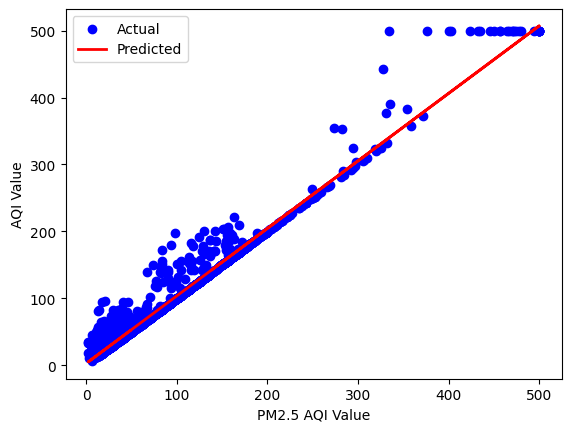

In [4]:
X = data[['PM2.5 AQI Value']].values
y = data['AQI Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
correlation = data['PM2.5 AQI Value'].corr(data['AQI Value'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Correlation: {correlation}')

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.legend()
plt.show()

# Висновки:
Оцінка R2, тобто коефіцієнт детермінації, зі значенням 0,969 демонструє, що приблизно 96,9% дисперсії значення AQI можна пояснити значенням AQI PM2.5, що вказує на відповідність.
Коефіцієнт кореляції зі значенням 0.985 демонструє сильний лінійний зв’язок між змінними `PM2.5 AQI Value` та `AQI Value`